<a href="https://colab.research.google.com/github/DucTran2810/Final-Project/blob/main/Training_Age_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_14 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 75, 75, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
91/91 [==============================] - 16s 142ms/step - loss: 2.8250 - acc: 0.1484 - val_loss: 2.1877 - val_acc: 0.1515
Epoch 2/30
91/91 [==============================] - 11s 122ms/step - loss: 2.1327 - acc: 0.1856 - val_loss: 2.1516 - val_acc: 0.1708
Epoch 3/30
91/91 [==============================] - 11s 123ms/step - loss: 2.0355 - acc: 0.2302 - val_loss: 2.0511 - val_acc: 0.2452
Epoch 4/30
91/91 [==============================] - 11s 123ms/step - loss: 1.9326 - acc: 0.2720 - val_loss: 2.0045 - val_acc: 0.2665
Epoch 5/30
91/91 [==============================] - 11s 122ms/step - loss: 1.8501 - acc: 0.2965 - val_loss: 1.8415 - val_acc: 0.3106
Epoch 6/30
91/91 [==============================] - 11s 121ms/step - loss: 1.7698 - acc: 0.3244 - val_loss: 1.7662 - val_acc: 0.3196
Epoch 7/30
91/91 [==============================] - 11s 121ms/step - loss: 1.7123 - acc: 0.3418 - val_loss: 1.6653 - val_acc: 0.3464
Epoch 8/30
91/91 [==============================] - 11s 121ms/step - 

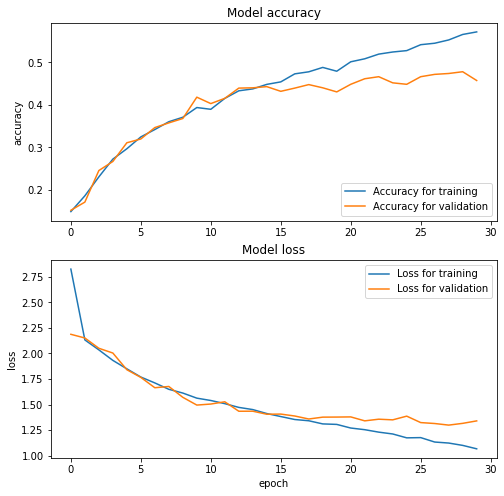

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m
# Load Data 
with open('./drive/MyDrive/Data_for_Training_Age2.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)
# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255
# Encoding Y
y_train = np_utils.to_categorical(y_train,9)
# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)
#Khởi tạo model
model = Sequential()
#1st CNN layer
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same',input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
#2nd CNN layer
model.add(Conv2D(64, (5,5), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(256, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

#5th CNN layer
model.add(Conv2D(512, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
#Fully connected 1st layer
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.25))

#Fully connected 2nd layer
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.25))
model.add(Dense(9, activation='softmax'))
model.summary()
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])

history = model.fit(x_train, y_train, epochs = 30, batch_size = 64, validation_split = 0.2)
model.save('./model_age_official_2.h5')
#Draw
f1 = history.history['acc']
val_f1 = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(f1, label='Accuracy for training')
plt.plot(val_f1, label='Accuracy for validation')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.title('Model accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Loss for training')
plt.plot(val_loss, label='Loss for validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.show()